## Импорт библиотек

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import seaborn as sns

## Загрузка DataFrame и первичный обзор

In [55]:
csv_path = r'C:\Users\ДНС\Jupyter Projects\Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(csv_path, encoding='ISO-8859-1')

In [56]:
print(display(df.head()))

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


None


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [58]:
print(display(df.describe()))

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


None


## Проверка и очистка данных 

In [59]:
# Удаление повторяющихся строк (дубикатов), основанных на столбцах 'Track' и 'Artist', оставляя одну запись с максимальным числом прослушиваний

df_cleaned = df.sort_values('Spotify Streams', ascending=False).drop_duplicates(subset=['Track', 'Artist'])
# sort_values - метод сортирует данные в DataFrame по столбцу 'Spotify Streams'
# ascending=False - сортировка в порядке убывания
# drop_duplicates - метод который удаляет дубликаты строк в DataFrame, ['Track', 'Artist'] - столбцы, которые должны
# быть проверены на дублировние

# Удаление пустых строк в столбце 'Spotify Streams'
df_cleaned = df_cleaned.dropna(subset=['Spotify Streams'])

In [60]:
# Преобразование столбца 'Release Date' в формат datetime
df_cleaned['Release Date'] = pd.to_datetime(df_cleaned['Release Date'], format ='%m/%d/%Y')

In [61]:
# Преобразование столбца 'Spotify Streams' в числовой формат
df_cleaned['Spotify Streams'] = df_cleaned['Spotify Streams'].str.replace(',', '').astype(int)

## Анализ по времени

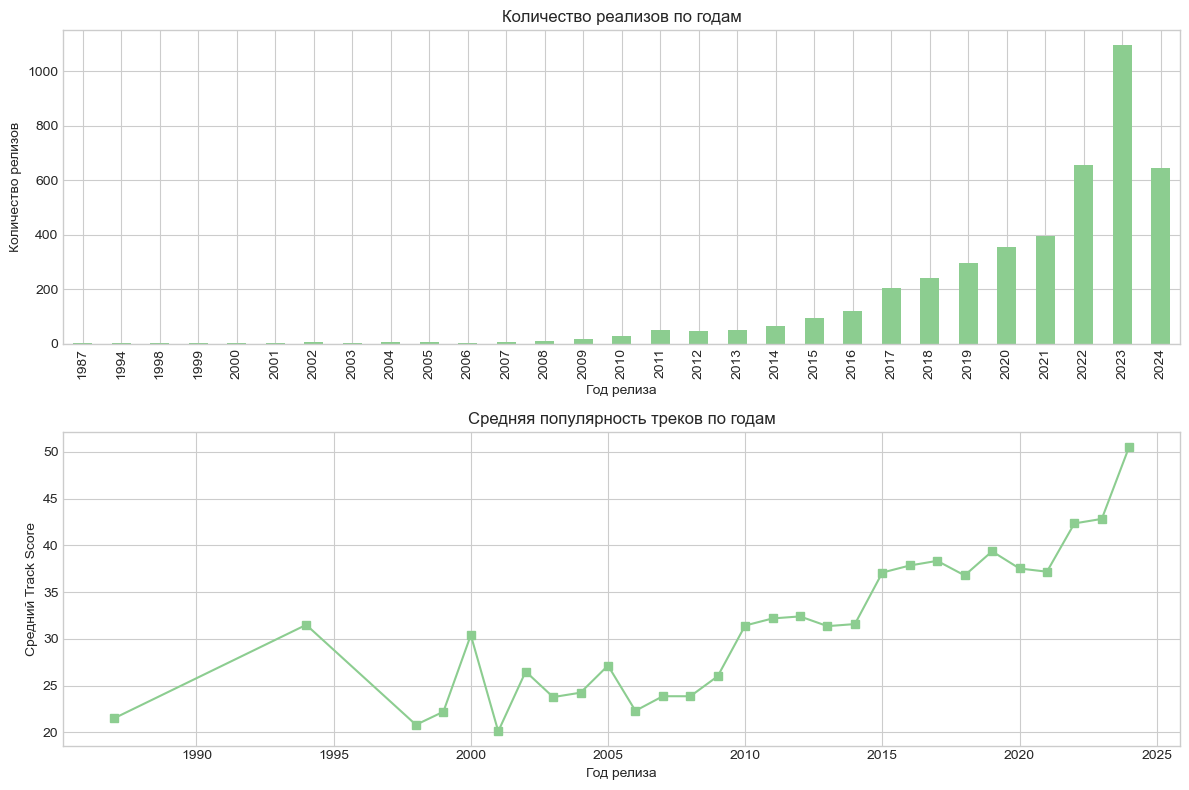

In [62]:
# Извлечение года и месяца в отдельные новые столбцы
df_cleaned['Release Year'] = df_cleaned['Release Date'].dt.year
df_cleaned['Release Month'] = df_cleaned['Release Date'].dt.month

# Создание фигуры
plt.figure(figsize=(12,8))
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(palette='Greens_d') # Задаем палитру перед графиками, чтобы применить ее на них

# Данные первого графика (анализ количества выпущенных треков по годам)
ax1 = plt.subplot(2,1,1) # 2-количество строк, 1-количество столбцов, 1-индекс, позиция конкретного графика
releases_per_year = df_cleaned['Release Year'].value_counts().sort_index() #value_counts() - сортирует series по индексам (годам), sort_index() упорядочивает их по хронологическому порядку
releases_per_year.plot(kind='bar')
plt.title('Количество реализов по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество релизов')

# Данные второго графика (анализ популярности треков по годам)
ax2 = plt.subplot(2,1,2)
popularity_per_year = df_cleaned.groupby('Release Year')['Track Score'].mean()
# groupby('Release Year') - группирует строки df по уникальным значениям в столбце 'Release Year'
# groupby('Release Year')['Track Score'] - после группировки по 'Release Year', groupby выбирает конкретный столбец 'Track Score' из каждой группы
popularity_per_year.plot(kind='line', marker='s')
plt.title('Средняя популярность треков по годам')
plt.xlabel('Год релиза')
plt.ylabel('Средний Track Score')



# Отображение графиков
plt.tight_layout() # автоматичекое размещение подграфиков без перекрытия
plt.show()

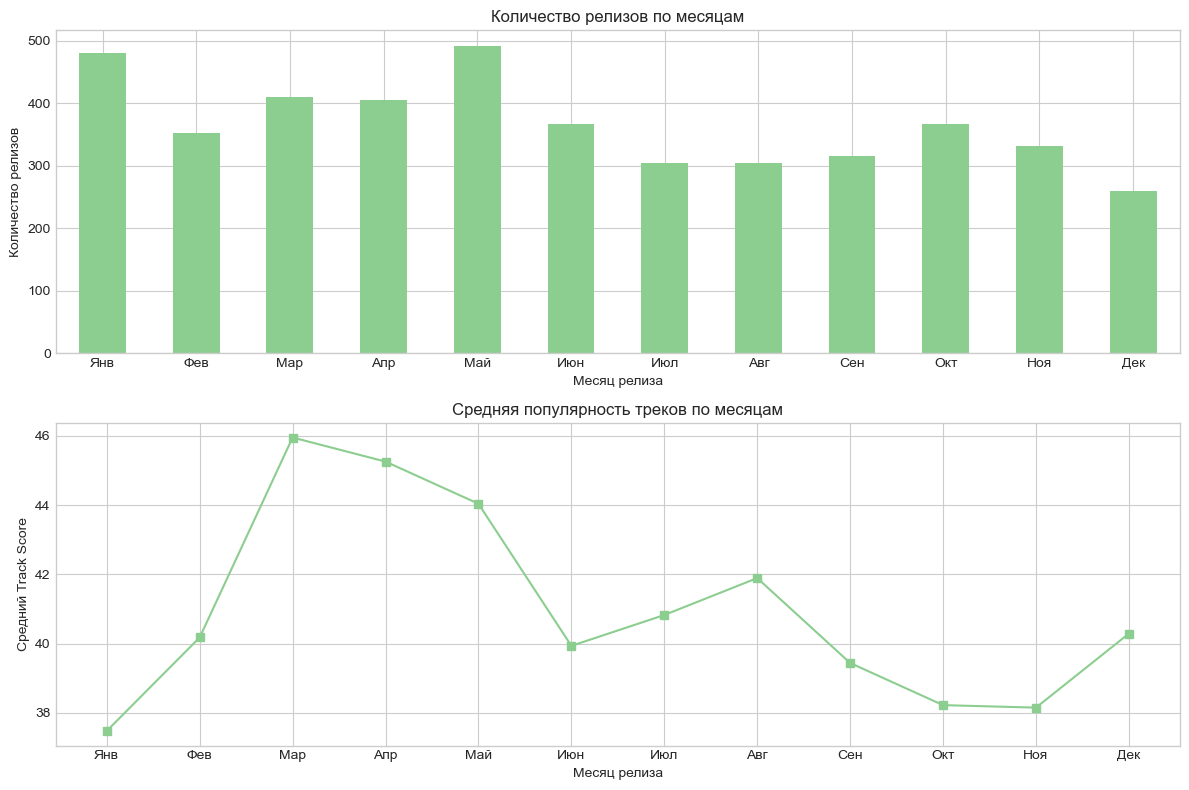

In [63]:
# Извлечение года и месяца в отдельные новые столбцы (в годовом анализе)

# Создание фигуры
plt.figure(figsize=(12,8))
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(palette='Greens_d') # Задаем палитру перед графиками, чтобы применить ее на них

# Данные первого графика (анализ количества выпущенных треков по месяцам)
ax1 = plt.subplot(2,1,1) # 2-количество строк, 1-количество столбцов, 1-индекс, позиция конкретного графика
releases_per_month = df_cleaned['Release Month'].value_counts().sort_index() #Выборка данных
releases_per_month.plot(kind='bar')
plt.title('Количество релизов по месяцам')
plt.xlabel('Месяц релиза')
plt.xticks(ticks=np.arange(len(releases_per_month)), labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'], rotation=0)
# ticks=np.arange(len(releases_per_month)) создает массив индексов для каждого столбца на графике
# np.arange(len(releases_per_month)) возвращает массив [0, 1, 2, ..., 11], который соответствует каждому месяцу
# labels=['Янв', 'Фев', ... , 'Дек'] задает подписи для каждого столбца. Так как метки распределены по индексам, каждая метка попадает прямо под соответствующий столбец
# rotation=0 означает, что метки на оси X будут отображаться горизонтально
plt.ylabel('Количество релизов')

# Данные второго графика (анализ популярности треков по месяцам)
ax2 = plt.subplot(2,1,2)
popularity_per_month = df_cleaned.groupby('Release Month')['Track Score'].mean()
popularity_per_month.plot(kind='line', marker='s')
plt.title('Средняя популярность треков по месяцам')
plt.xlabel('Месяц релиза')
plt.xticks(ticks=np.arange(1, 13), labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'], rotation=0)
plt.ylabel('Средний Track Score')

# Отображение графиков
plt.tight_layout() # автоматичекое размещение подграфиков без перекрытия
plt.show()

## Анализ популярности треков

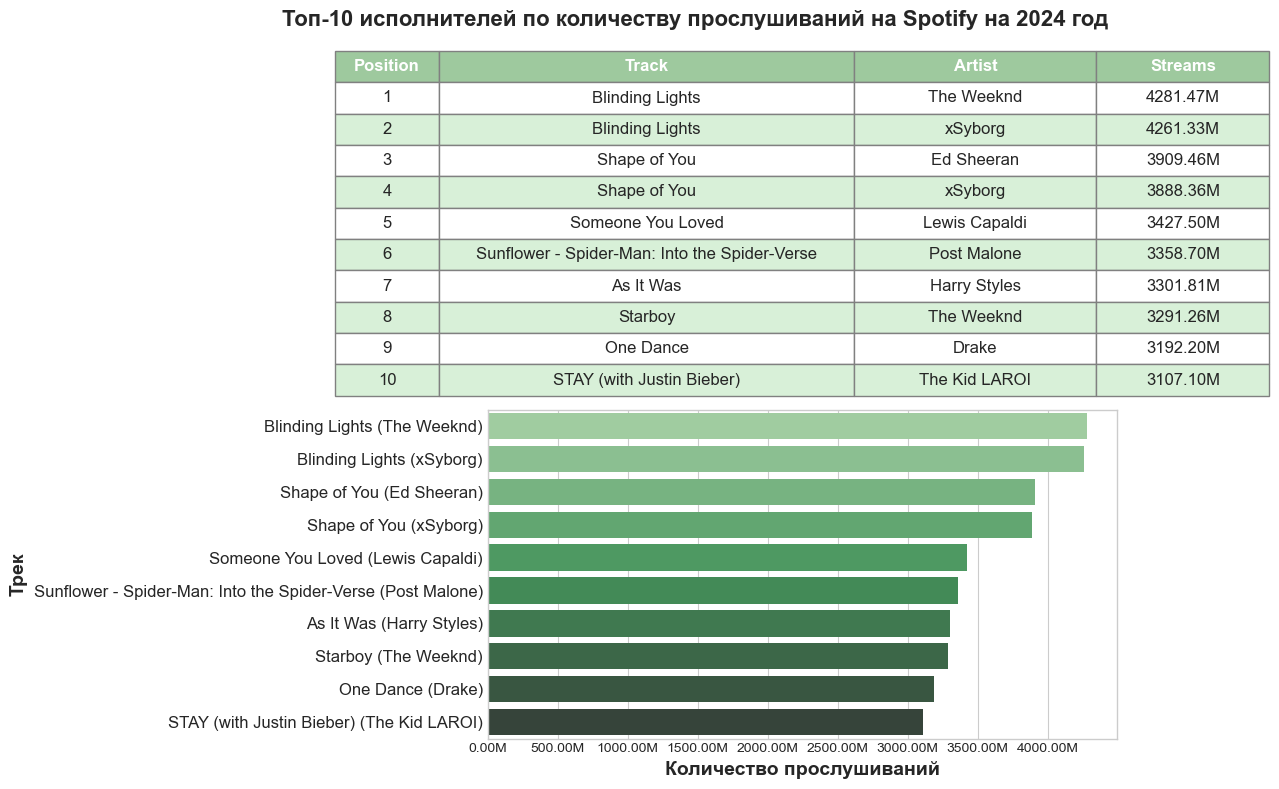

In [64]:
# Топ-10 самых прослушиваемых треков, основанный на Spotify Streams (каждый раз, когда пользователь включает трек)

top_tracks = df_cleaned[['Track', 'Artist', 'Spotify Streams']].sort_values(by='Spotify Streams', ascending=False).head(10)
# sort_values - метод сортирует данные по столбцу 'Spotify Streams'
# ascending=False - сортировка в порядке убывания
top_tracks['Position'] = range(1, 11)
top_tracks['Track & Artist'] = top_tracks['Track'] + ' (' + top_tracks['Artist'] + ')' 
top_tracks['Streams'] = top_tracks['Spotify Streams'].apply(lambda x: f'{x/1e6:.2f}M')
# print(top_tracks[['Position', 'Track & Artist', 'Streams']].to_string(index=False))  # Печать без индексов

# Создание фигуры
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(palette='Greens_d')
plt.suptitle('Топ-10 исполнителей по количеству прослушиваний на Spotify на 2024 год', fontsize=16, weight='bold')

# Визуализация таблицы
ax0 = plt.subplot(2, 1, 1)
ax0.axis('off')

# Настройка таблицы 
col_widths = [0.15, 0.6, 0.35, 0.25]
table = ax0.table(
    cellText=top_tracks[['Position', 'Track', 'Artist', 'Streams']].values,
    colLabels=['Position', 'Track', 'Artist', 'Streams'],
    cellLoc='center',
    loc='center',
    colWidths=col_widths
)

table.auto_set_font_size(False) # Отключение авто-настройки шрифта
table.set_fontsize(12) # Размер шрифта для таблицы
table.scale(1.1, 1.6)  # table.scale(width_scale, height_scale)

# Стилизация таблицы
for key, cell in table.get_celld().items():
    cell.set_edgecolor('Grey')
    if key[0] == 0: #если это заголовок
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#9EC99E')
    else:
        cell.set_facecolor('#D8F0D8' if key[0] % 2 == 0 else 'white')

# Визуализация графика
ax1 = plt.subplot(2, 1, 2)
sns.barplot(x='Spotify Streams', y='Track & Artist', hue='Track & Artist', legend=False, data=top_tracks, palette='Greens_d', errorbar=None)

ax1.set_xlabel('Количество прослушиваний', fontsize=14, weight='bold')
ax1.set_ylabel('Трек', fontsize=14, weight='bold')

ax1.set_yticks(range(len(top_tracks)))
ax1.set_yticklabels(top_tracks['Track & Artist'], fontsize=12)

formatter = mtick.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M')
# mtick.FuncFormatter - кастомизация меток на осях
# lambda x, _: - x - 'лямбда'-функция
# x/1e6:.2fM - преобразует значения в миллионы и округляет их до двух знаков после запятой
ax1.xaxis.set_major_formatter(formatter)

plt.subplots_adjust(hspace=0.2) # Настройка вертикального расстояния между графиками
plt.tight_layout(rect=[0, 0, 1, 0.99]) # [left, bottom, right, top] подгонка, чтобы таблица и график не перекрывались
# left=0 - левая граница остается на самой левой стороне холста
# bottom=0 - нижняя граница остается на самой нижней стороне холста
# right=1 - правая граница остается на самой правой стороне холста
# top=0.99 - верхняя граница устанавливается чуть ниже верхней границы холста, на уровне 99% от полной высоты холста 
plt.show()

## Анализ популярности исполнителей

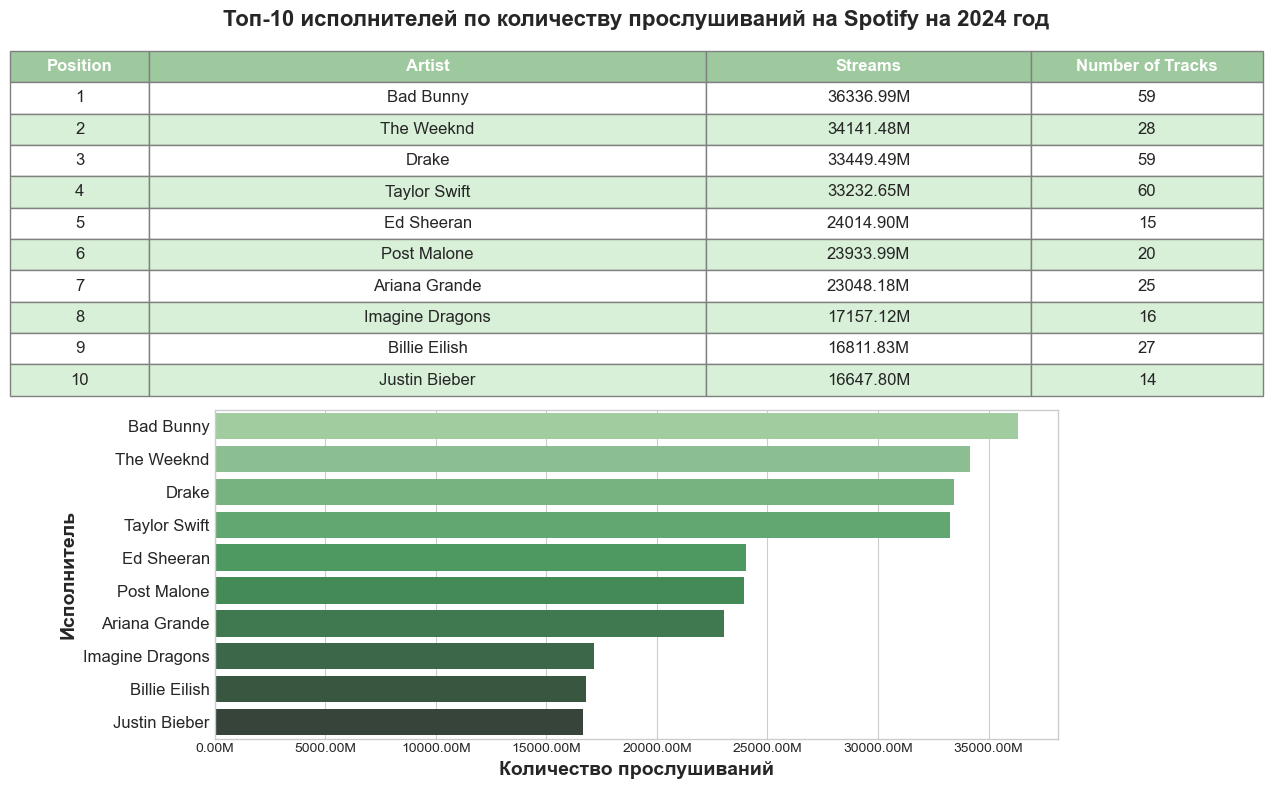

In [65]:
# Топ-10 самых популярных исполнителей, основанный на Spotify Streams

# Сумма всех прослушиваний для каждого исполнителя
# Группируем данные по столбцу 'Artist' и суммируем все значения 'Spotify Streams'
top_artist_streams = df_cleaned.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(10)

# Количество треков у каждого исполнителя
# Группируем данные по столбцу 'Artist' и считаем количество элементов в 'Track'
top_artist_tracks = df_cleaned.groupby('Artist')['Track'].count()

# top_artist_streams и top_artist_tracks - предварительно вычисленные Series 

# Создание DataFrame с нужными столбцами
top_artist = pd.DataFrame({
    'Position': range(1, (len(top_artist_streams)+1)),
    'Artist': top_artist_streams.index,
    'Spotify Streams': top_artist_streams.values,
    'Number of Tracks': top_artist_tracks[top_artist_streams.index].values  # Количество треков для тех же исполнителей
})
# 'Artist': top_artist_streams.index - содержит имена исполнителей, которые являются индексами в Series top_artist_streams
# 'Spotify Streams': top_artist_streams.values - содержит значения стримов 
# top_artist_tracks[top_artist_streams.index] выбирает только те записи из top_artist_tracks, индексы которых совпадают с именами исполнителей из top_artist_streams. Это важно, чтобы значения соответствовали топ-10 исполнителям по стримам.

top_artist['Streams'] = top_artist['Spotify Streams'].apply(lambda x: f'{x/1e6:.2f}M')

# Создание фигуры
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette(palette='Greens_d')
plt.suptitle('Топ-10 исполнителей по количеству прослушиваний на Spotify на 2024 год', fontsize=16, weight='bold')

# Создание таблицы
ax0 = plt.subplot(2, 1, 1) # 2 строки, 1 столбец, 1-я позиция
ax0.axis('off')

# Настройка таблицы
col_widths = [0.15, 0.6, 0.35, 0.25]
table = ax0.table(
    cellText=top_artist[['Position', 'Artist', 'Streams', 'Number of Tracks']].values,
    colLabels=['Position', 'Artist', 'Streams', 'Number of Tracks'],
    cellLoc='center',
    loc='center',
    colWidths=col_widths
)

table.auto_set_font_size(False) # Отключение авто-настройки шрифта
table.set_fontsize(12) # Размер шрифта для таблицы
table.scale(1.1, 1.6)  # table.scale(width_scale, height_scale)

# Стилизация таблицы
for key, cell in table.get_celld().items():
    cell.set_edgecolor('Grey')
    if key[0] == 0: #если это заголовок
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#9EC99E')
    else:
        cell.set_facecolor('#D8F0D8' if key[0] % 2 == 0 else 'white')
# table.get_celld() - возвращает словарь, где ключи - координаты ячеек таблицы в виде кортежей (row, column),
# а значениями - объекты, cell, представляющие ячейки таблицы
# key - это координаты ячейки (row, column)
# cell - это объект, представляющий конкретную ячейку таблицы
# цикл for проходит по всем ячейкам таблицы
# метод .items() - позволяет итерировать по словарю, получая пары ключ-значение

# Создание графика
ax1 = plt.subplot(2, 1, 2)
sns.barplot(x='Spotify Streams', y='Artist', hue='Artist', data=top_artist, palette='Greens_d', legend=False, errorbar=None)

ax1.set_xlabel('Количество прослушиваний', fontsize=14, weight='bold')
ax1.set_ylabel('Исполнитель', fontsize=14, weight='bold')

ax1.set_yticks(range(len(top_artist)))
ax1.set_yticklabels(top_artist['Artist'], fontsize=12)

formatter = mtick.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M')
ax1.xaxis.set_major_formatter(formatter)

plt.subplots_adjust(hspace=0.2)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()